In [11]:
import random
import os

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange, tqdm

In [2]:
def randomized_greedy_qap(distance_matrix, flow_matrix, p=0.1):
    num_facilities = distance_matrix.shape[0]
    
    unassigned = set(range(num_facilities))
    assignment = [-1] * num_facilities

    while unassigned:
        min_cost = float('inf')
        selected_pair = (None, None)

        # Consider all pairs (i, j) where i is an unassigned facility and j is a location
        candidates = []
        for i in unassigned:
            for j in range(num_facilities):
                if assignment[j] == -1:  # check if location j is unassigned
                    cost = sum(flow_matrix[i][k] * distance_matrix[j][assignment[k]] for k in range(num_facilities) if assignment[k] != -1)
                    if cost < min_cost:
                        min_cost = cost
                        selected_pair = (i, j)
                        candidates = [(i, j)]
                    elif cost == min_cost:
                        candidates.append((i, j))
        
        # Select a random pair from the top p fraction of candidates
        num_candidates_to_consider = int(p * len(candidates))
        if num_candidates_to_consider < 1:
            num_candidates_to_consider = 1
        i, j = candidates[np.random.choice(num_candidates_to_consider)]

        # Assign facility i to location j
        assignment[j] = i
        unassigned.remove(i)

    return assignment

In [3]:
def sol_cost(solution, distance_matrix, flow_matrix):
    cost = 0
    num_facilities = len(solution)
    for i in range(num_facilities):
        for j in range(num_facilities):
            cost += distance_matrix[i][j] * flow_matrix[solution[i]][solution[j]]
    return cost

In [4]:

def visualize_qap_solution(distance_matrix, flow_matrix, solution):
    num_facilities = distance_matrix.shape[0]
    cost_matrix = np.zeros((num_facilities, num_facilities))

    for i in range(num_facilities):
        for j in range(num_facilities):
            cost_matrix[i][j] = distance_matrix[i][j] * flow_matrix[solution[i]][solution[j]]

    plt.matshow(cost_matrix, cmap='viridis')
    plt.colorbar(label='Cost')
    plt.title('Cost for each Facility-Location Mapping')
    plt.xlabel('Facilities')
    plt.ylabel('Locations')
    plt.show()

In [5]:
# set up params for plots
SMALL, MED, LARGE, LW = 18, 24, 30, 3
plt.rc('axes', titlesize=SMALL)    # fontsize of the axes title
plt.rc('axes', labelsize=SMALL)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL) # fontsize of the tick labels
plt.rc('legend', fontsize=MED)   # legend fontsize
plt.rc('font', size=SMALL)       # controls default text sizes

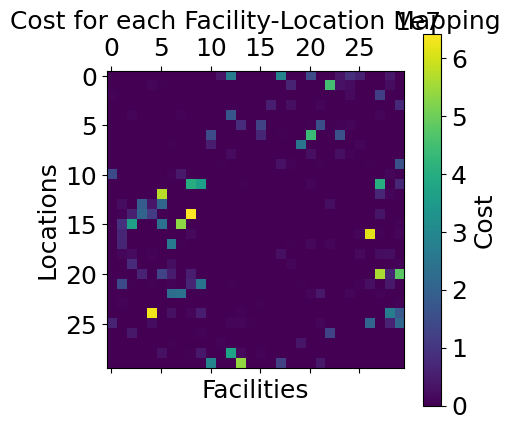

[3, 9, 17, 2, 23, 8, 7, 22, 0, 14, 13, 16, 25, 27, 15, 26, 12, 10, 4, 6, 19, 5, 28, 24, 21, 18, 11, 20, 1, 29]
1610370083


In [7]:
# for managing file opening and closing
def read_integers(filename):
    with open(filename) as f:
        return [int(elem) for elem in f.read().split()]

# Using raw string for the path
file_path = '../QAPInstances/tai30b.dat'  # Change 'tai30b.dat' to your actual file name
file_it = iter(read_integers(file_path))

# Number of points
n = next(file_it)

# Distance between locations
w = np.array([[next(file_it) for j in range(n)] for i in range(n)])
d = np.array([[next(file_it) for j in range(n)] for i in range(n)])

solution = randomized_greedy_qap(w, d)
cost = sol_cost(solution,w,d)
visualize_qap_solution(w, d, solution)
print(solution)
print(cost)

### Automated Testing

In [12]:
instance_path = '../QAPInstances/'
soln_path     = '../QAPSolns/'

def open_solution(filename: str):
    file_it = iter(read_integers(filename))
    _ = next(file_it)    # this is just how the files within the lib are formatted
    return next(file_it)

        

def test_hueristic(n_iters=10_000, tai_only=False):
    
    results = [] # for storing results

    for filename in tqdm(os.listdir(instance_path)):
        

        if tai_only and 'tai' not in filename: continue

        file_it = iter(read_integers(instance_path+filename))

        # open QAP instance param's 
        n = next(file_it)
        w = np.array([[next(file_it) for j in range(n)] for i in range(n)])
        d = np.array([[next(file_it) for j in range(n)] for i in range(n)])

        # generate an instance
        rg = randomized_greedy_qap(w, d)

        # open up corresponding soln from QAPLib: 
        soln_file = filename[:-4]+'.sln' # this removes the .dat from filename
        
        try:
            qap_soln = open_solution(soln_path+soln_file)
            huerstic_soln = randomized_greedy_qap(w, d)

            # compute gap
            gap = 100*(sol_cost(huerstic_soln,w,d) - qap_soln)/qap_soln
            results.append((soln_file, gap))
            

        # any instances without corresponding solution files are deleted
        except FileNotFoundError:
            os.remove(instance_path+filename) 
    
    # just printing results for now, but will need to save to file or something 
    print(results)

    return 

In [13]:
test_hueristic(10)

 95%|█████████▌| 121/127 [20:16<01:08, 11.35s/it] /var/folders/lf/4mh_0n4n78n4qhfwrnvj3l7c0000gn/T/ipykernel_29905/2506502942.py:35: RuntimeWarning: invalid value encountered in scalar divide
  gap = 100*(sol_cost(huerstic_soln,w,d) - qap_soln)/qap_soln
100%|██████████| 127/127 [20:23<00:00,  9.64s/it]

[('tai35b.sln', 97.00349375587342), ('chr22a.sln', 181.74139051332034), ('esc16h.sln', 34.53815261044177), ('lipa40a.sln', 4.194939438138119), ('chr18a.sln', 622.0580284735988), ('lipa60b.sln', 30.776248097820158), ('esc16i.sln', 385.7142857142857), ('tai15a.sln', 34.36043007207365), ('nug16a.sln', 40.24844720496895), ('tai35a.sln', 22.501302641368586), ('chr22b.sln', 153.2127865676461), ('lipa40b.sln', 32.54452023895204), ('chr18b.sln', 145.5019556714472), ('tho30.sln', 55.01947497598976), ('lipa60a.sln', 2.651607006286258), ('esc16j.sln', 175.0), ('tai15b.sln', 1254.6141265993253), ('rou20.sln', 26.17673895484906), ('lipa20a.sln', 6.597882161281564), ('chr15a.sln', 647.3524656426839), ('tai80b.sln', 57.27307385282262), ('lipa20b.sln', 30.584281282316443), ('chr15b.sln', 705.5819774718398), ('tai150b.sln', 31.67583550968091), ('chr15c.sln', 475.84175084175087), ('tai80a.sln', 16.70335036547394), ('lipa50b.sln', 29.67459454457118), ('tai100a.sln', 14.320916134005394), ('tai25a.sln', 29